```
conda install -y h5py seaborn scikit-learn

pip install tensorflow 

git clone git@github.com:fchollet/keras.git && cd keras && python setup.py install (w sali nie ma pewnie zainstalowanego gita, więc zainstalowanie kerasa sprowadzi się do wejścia na github.com/fchollet i sklonowania projektu keras poprzez ściągnięcie go jako archiwum *.zip, rozpakowanie a następnie wywołanie python setup.py install)

ściągnać dane z https://drive.google.com/open?id=1e_eslOQrpP6lDZZ908RGLlqWzoAgt_4b (256MB) i rozpakować w folderze z notebookiem (folder data powinien pojawić się w głównym folderze z notebookiem)
```

## Uczenie głębokie z wykorzystaniem dedykowanych narzędzi

### Spis treści:
    1) Wstęp: oprogramowanie dedykowane sieciom neuronowym
    2) Wstęp do obliczeń symbolicznych
    3) Keras
    4.) Hands-on computer vision: prezentacja i ćwiczenie z rozpoznawania obrazu

----

## 1.)  Wstęp: oprogramowanie dedykowane sieciom neuronowym

- Wraz z rosnącym zainteresowaniem sieciami neuronowymi, rosło zapotrzebowanie na dedykowane narzędzia, które ułatwiłyby i przyspieszyły proces tworzenia, a następnie uczenia głębokich modeli. 


- Z upływem lat kolejne grupy badawcze prezentowały swoje rozwiązania, a w ostatnim czasie tematem zainteresował się również przemysł. Dzięki nowym źródłom finansowania i niesłabnącemu zapotrzebowaniu, większość frameworków jest obecnie aktywnie rozwijana i ulepszana.

- Do najpopularniejszych narzędzi należą:

    - [Tensorflow](http://tensorflow.org) (**Google**)
        - Python, Go, C++
        - Najpopularniejszy z obecnie istniejących frameworków
        - Najintensywniej rozwijany

    - [Theano](http://deeplearning.net/software/theano/) (**U. Montreal**)
        - Python
        - Był prekursorem TensorFlow
        - Rozwijany przez uniwersytet w Montrealu (non-profit)
        - Obecnie coraz częściej porzucany na rzecz TF

    - [Torch](http://torch.ch/) (**Facebook, Twitter**)
        - Lua
        - Najmniej popularny ze względu na brak bindingów Pythonowych
        - Nie wspiera automatycznego różniczkowania

    - [MXNet](http://mxnet.io/) (**Amazon**)
        - Python, C++, Go, Julia, Scala, R, ...
        - Najwydajniejszy pod względem pamięci 
        - Od niedawna wspierany przez Amazon

<img style="float: left;" src="img/tf-logo-2.png"> 
<img style="float: left;" src="img/th-logo.png">
<img style="float: left;" src="img/torch-logo-f.png">
<img style="float: left;" src="img/mx-logo.png">

- Wszystkie z tych narzędzi są rozwijane jako projekty OpenSource:

    - https://github.com/tensorflow/tensorflow

    - https://github.com/torch/torch7

    - https://github.com/Theano/Theano

    - https://github.com/dmlc/mxnet

- Wymienione wyżej narzędzia to zazwyczaj biblioteki operujące na dosyć niskim poziomie abstrakcji.

- Wokół nich powstało wiele projektów mających jeszcze bardziej ułatwić użytkownikom uczenie sieci neuronowych.

- Najpopularniejszym z takich projektów jest obecnie **Keras**, na którym skupimy się w dalszej części

![k](img/keras-logo.png)

----

## 2.) Wstęp do obliczeń symbolicznych

- Sercem większości frameworków wysokiego poziomu jest jeden z wyżej wymienionych silników.
- Keras, którego będziemy dzisiaj używać, posiada dwa takie backendy: Tensorflow oraz Theano
- Warto poświęcić chwilę, żeby zapoznać się z najbardziej podstawowymi zasadami ich działania.

- Tensorflow i Theano to przykłady narzędzi, które tworzą graf operacji symbolicznych.

- Oznacza to, że operacje wykonywane na zmiennych nie mają natychmiastowego efektu. Są jedynie dodawane do grafu.

- Następnie graf jest kompilowany i wykonwyany.

Przykład:

In [1]:
import tensorflow as tf
import numpy as np

from helpers3 import show_graph
from helpers3 import execute_tf_graph

def get_tf_graph():
    return tf.get_default_graph().as_graph_def()

C:\Users\apasi\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()

a = tf.Variable(2.)
b = tf.Variable(2.)
result = a + b

print(result)

Tensor("add:0", shape=(), dtype=float32)


`result` nie jest równe 4! 

Jest tylko węzłem w grafie, symbolizującym operację dodania zmiennej `a` do `b`

In [3]:
graph = get_tf_graph()

show_graph(graph_def=graph, width=900, height=300)

Zbudowany graf możemy "wykonać", jako parametr `outputs` podając te zmienne, których wartość chcemy obliczyć.

In [4]:
execute_tf_graph(result)

[4.0]

Dobrze, ale co zrobić, jeżeli chcemy obliczyć sumę `2 + 3`. Czy musimy zbudować i skompilować cały graf od nowa?

Na szczęście nie -- możemy podać wartości dowolnej zmiennej w grafie przy jego wywołaniu.

Aby to zrobić, tworzymy słownik, który przypisze wybranym zmiennym odpowiednie wartości

In [10]:
inputs = {
    a: 2,
    b: 3
}

execute_tf_graph(outputs=result, inputs=inputs)

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Variable_1:0", shape=(), dtype=float32_ref) is not an element of this graph.

Zwróć uwagę, że w słowniku tym nie podajemy nazw zmiennych (typu `str`), ale obiekty `Pythona`!

**Uwaga!**: w praktyce, jeżeli chcemy, żeby nasza zmienna była inicjalizowana dopiero przy wywołaniu grafu, 
oraz żeby jej podanie było obowiązkowe, należy **tf.Variable** zamienić na **tf.placeholder**

In [6]:
tf.reset_default_graph()
a = tf.placeholder(dtype=np.float32, name='zmienna_a')
result = a + 1

try:
    execute_tf_graph(result)
except tf.errors.InvalidArgumentError as e:
    print(e.message)

You must feed a value for placeholder tensor 'zmienna_a' with dtype float
	 [[Node: zmienna_a = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


----

### zadanie 1: 
    - oblicz kwadraty liczb 2, 3 i 4 używając TensorFlow. Wykorzystaj mechanizm placeholderów

### rozwiązanie 1: 

In [5]:
tf.reset_default_graph()
a = tf.placeholder(dtype=np.float32, name='zmienna_a')
b = tf.placeholder(dtype=np.float32, name='zmienna_b')
c = tf.placeholder(dtype=np.float32, name='zmienna_c')
result = [a**2, b**2, c**2]

inputs = {
    a: 2.,
    b: 3.,
    c: 4.
}
#print(inputs)
execute_tf_graph(outputs=result, inputs=inputs)



[4.0, 9.0, 16.0]

### zadanie 2: 
    - dodaj dwie macierze jednostkowe 2x2

### rozwiązanie 2: 

In [12]:
tf.reset_default_graph()
a = tf.Variable(np.identity(2))
b = tf.Variable(np.identity(2))
result = a+b
#print(np.ones((2,2)))
#print(np.identity(2))
execute_tf_graph(result)


[[1. 1.]
 [1. 1.]]


[array([[2., 0.],
        [0., 2.]])]

- Warto zaznaczyć, iż **Tensorflow został stworzony dla operacji na macierzach (tensorach)**. Radzi więc sobie wspaniale z wielowymiarowymi danymi. (Patrz rozw. powyżej)

- Jakie są jednak konkretne zalety tego symbolicznego podejścia? Trzy najważniejsze to:
    1. Optymalizacja: znając cały graf, kompilator może zoptymalizować wykonywane operacje
    2. Współbieżność: kompilator sam zadba o to, aby wykonać obliczenia równolegle
    3. Niezależność od architektury: Znając graf, kompilator może wygenerować kod dla CPU / GPU / FPGA itd.
    
- Szczególnie punkt trzeci jest tak istotny, gdyż obecnie do uczenia sieci neuronowych niemalże niezbędny jest procesor graficzny wspierający technologię `CUDA`

---- 

## 3.) Keras

### Czym is Keras?

Za https://keras.io:

> ### Keras: Deep Learning library for Theano and TensorFlow
>
> Keras is a **high-level neural networks** library, written in **Python** and capable of running on top of either **TensorFlow** or **Theano**. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

- Jest to biblioteka mająca ułatwić tworzenie sieci neuronowych, operująca na wyższym poziomie abstrakcji niż tensorflow / theano
- Jako backend obliczeniowy może wykorzystywać jeden z wyżej wymienionych silników


### Dlaczego Keras?

- Łatwy do opanowania
- Czytelny
- Popularny i aktywnie rozwijany 
- Dobrze udokumentowany

### Jak nauczyć sieć neuronową?

Będziemy potrzebować trzech elementów:
1. Dane
2. Architektura sieci
3. Metoda optymalizacji
    - Funkcja straty
    - Algorytm optymalizacyjny

#### Dane

- Keras współpracuje z numpy, w związku z tym można korzystać z dowolnego zbioru danych, który jesteśmy w stanie wczytać do pamięci.
- Może korzystać ze zbiorów zbyt dużych, żeby zmieścić się w pamięci: potrzebna jest wtedy biblioteka `h5py`
- Posiada także kilka wbudowanych zbiorów danych, jak np. mnist

#### [MNIST](http://yann.lecun.com/exdb/mnist/)
- klasyczny benchmark w computer vision (ponad 700 cytowań w pracach naukowych)
- 60 000 obrazów przedstawiających cyfry napisane ludzką ręką
- Można załadować bezpośrednio z kerasa

![mnist](img/mnist.png)

In [13]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import np_utils

import seaborn as sns

(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_size = 28

print("Wymiary zbioru, X: {}, y: {}".format(X_train.shape, y_train.shape))

Using TensorFlow backend.


11493376/11490434 [==============================] - 22s 2us/step
Wymiary zbioru, X: (60000, 28, 28), y: (60000,)


Przygotowanie danych: 
    - Obrazy, które trafiają do sieci neuronowej muszą mieć odpowiedni "kształt" (shape) oraz typ: 
        - (liczba_przykładów, szerokość, wysokość, liczba-kanałów) 
        - typem danych powinien być float32, a elementy macierzy powinny być w zakresie [0., 1.]
    - Etykiety (informacja, którą cyfrę przedstawia dany obrazek), powinny mieć kształt (liczba_przykładów, liczba_cyfr) patrz poniżej

In [14]:
# Keras oczekuje, iż etykiety będą macierzą binarną o kształcie (liczba_przykładów, liczba_możliwych_etykiet)
# Mówimy, że dany obraz należy do klasy **i**, kiedy w kolumnie **i-tej** znajduje się 1
# przykład:
etykiety = [
    0,
    1,
    2
]

etykiety_keras = [
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0]
]

# aby zamienić etykiety wczytane przez mnist.load_data(), skorzystamy z funkcji pomocniczej kerasa "to_categorical":
Y_train = np_utils.to_categorical(y_train, 10)
Y_test  = np_utils.to_categorical(y_test,  10)

In [15]:
# Przygotujmy też same obrazki
rozmiar = 28
X_train = X_train.reshape(-1, rozmiar, rozmiar, 1)
X_test  = X_test.reshape(-1,  rozmiar, rozmiar, 1)

X_train = X_train.astype(np.float32) / 255.
X_test  = X_test.astype(np.float32) / 255.

Label:  2


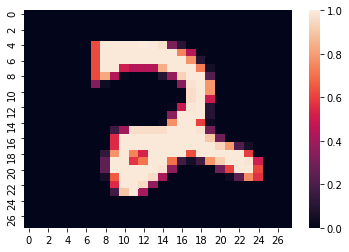

In [16]:
# Sprawdźmy, jak wyglądają nasze dane:
i = np.random.randint(0, y_train.shape[0])

print("Label: ", y_train[i])
sns.heatmap(X_train[i].reshape(rozmiar, rozmiar));

#### Architektura sieci
- Keras wspiera dwie metody definiowania architektury: model liniowy i API funkcjonalne.
- Skupimy się dzisiaj głównie na modelach liniowych, ponieważ w zupełności wystarczają one do większośći zastosowań praktycznych.
- Kluczowym pojęciem przy definiowaniu architektury jest pojęcie **warstwy**

#### Warstwy:

- Podstawowym elementem, z którego budowana jest sieć neuronowa, jest warstwa. 
- Model liniowy w kerasie to nic innego, jak tylko złożenie kolejnych, następujących po sobie warstw.
- Warstwa (layer) jest podstawową jednostką przetwarzania: 
- przyjmuje ona jakąś macierz (tensor) na wejściu, modyfikuje ją, a następnie podaje na wyściu

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input

from helpers3 import plot_confusion_matrix

In [18]:
# Aby zobrazować to w praktyce, zaimplementujemy regresję logistyczną, poznaną na poprzednich zajęciach, z użyciem kerasa

# zdefiniujmy najpierw warstwy, których użyjemy:

# regresja logistyczna oczekuje jednowymiarowego wektora cech. Obrazki to macierze kwadratowe, należy je "spłaszczyć"
flatten_layer = Flatten(input_shape=(rozmiar, rozmiar, 1))

# następnie wektor cech jest mnożony przez macierz wag. Macierz wag ma rozmiar (liczba_cech x liczba_klas)
# Keras sam odgadnie, jaka jest liczba cech! Podajemy jedynie liczbę klas.
# Warstwą realizującą mnożenie macierzy jest warstwa Dense:
matmul_layer = Dense(10)

# Teraz nasz model pobiera na wejściu obrazek 20x20, a generuje wektor o rozmiarze (10, ), 
# gdzie każdy element tego wektora to "wynik" danej klasy. Należy zamienić jeszcze ten wynik na prawdopodobieństwa
get_probas_layer = Activation("softmax")

# I to wszystko! Zbudujmy model ze zdefiniowanych wyżej warstw
model = Sequential()
model.add(flatten_layer)
model.add(matmul_layer)
model.add(get_probas_layer)

#### Metoda optymalizacji
- Keras musi wiedzieć, jaką funkcję straty chcemy minimalizować.
- Musi także wiedzieć, jakiej metody ma użyć do minimalizacji
- Dobra wiadomość: nie musimy umieć implementować tych elementów: keras o wszystko zadba!

skorzystamy ze standardowego zestawu w przypadku klasyfikacji: straty logistycznej i optymalizatora [Adam](google.com)

In [19]:
f_straty = "categorical_crossentropy"
optymalizator = "adam"

# Model należy jeszcze skompilować, podając wybraną stratę i optymalizator
model.compile(loss=f_straty, optimizer=optymalizator)

#### Uczenie:
- Nasz model jest już kompletny!
- Teraz wystarczy wywołać funkcję, która rozpocznie proces uczenia

In [20]:
liczba_iteracji = 5
model.fit(X_train, Y_train, nb_epoch=liczba_iteracji)

C:\Users\apasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.4693
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.3031
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.2829
Epoch 4/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2727
Epoch 5/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2662



Accuracy: 0.9258


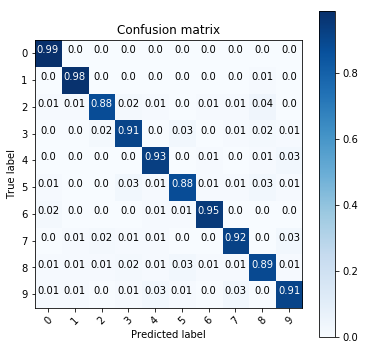

In [21]:
# jak sobie poradziliśmy?
preds = model.predict_classes(X_test)
acc   = np.mean(preds == y_test)

plot_confusion_matrix(y_test, preds)
print("\nAccuracy: {}".format(acc))

#### Gdzie są sieci neuronowe?!

- Powyższy model to zwykła regresja logistyczna w kerasie. Jak przejść od niej do uczenia głębokiego? 
- Proste: dodać więcej warstw!

In [22]:
model = Sequential()

model.add(Flatten(input_shape=(rozmiar, rozmiar, 1)))

# pomiędzy warstwami mnożącymi macierze powinny znajdować się funkcje aktywacji
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.15)) # todo?

model.add(Dense(32))
model.add(Activation("relu")) 
model.add(Dropout(0.15)) 

model.add(Dense(10))
model.add(Activation("softmax")) 

model.compile('adam', 'categorical_crossentropy')

In [23]:
liczba_iteracji = 5
model.fit(X_train, Y_train, nb_epoch=liczba_iteracji)

C:\Users\apasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.4928
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2790
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2357
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2130
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1974


In [24]:
# jak sobie poradziliśmy?
preds = model.predict_classes(X_test)
acc   = np.mean(preds == y_test)

print("\nAccuracy: {}".format(acc))


Accuracy: 0.9591


#### Sieci konwolucyjne
- Dotychczas jako podstawowych elementów przetwarzania używaliśmy warstw, które wykonują proste mnożenie macierzy
- Istnieją warstwy, które dedykowane są konkretnie rozpoznawaniu obrazów: tzw. warstwy konwolucyjne.
- Dobieranie parametrów tych warstw to bardziej sztuka niż nauka i wymaga sporej wprawy. Dlatego nie zajmiemy się tym na tych zajęciach.

In [ ]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [ ]:
# Przykład sieci z warstwami konwolucyjnymi
model = Sequential()

model.add(Convolution2D(8, 3, 3, border_mode='valid', input_shape=(rozmiar, rozmiar, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(8, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile('adam', 'categorical_crossentropy')

In [ ]:
liczba_iteracji = 5
model.fit(X_train, Y_train, nb_epoch=liczba_iteracji)

In [ ]:
# jak sobie poradziliśmy?
preds = model.predict_classes(X_test)
acc   = np.mean(preds == y_test)

print("\nAccuracy: {}".format(acc))

#### "Prawdziwa" sieć neuronowa
- Keras udostępnia gotowe, wyuczone już modele.
- Są to potężne sieci neuronowe, uczone tygodniami na olbrzymim zbiorze danych [Imagenet](http://www.image-net.org/)
- Możemy wykorzystać tę sieć i szybko dostosować ją do własnych potrzeb

- Spróbujemy w krótkim czasie stworzyć model, który z dużą dokładnością (ok. 90%) nauczy się odróżniać koty od psów
- W tym celu potrzebne nam będą dwa dodatkowe pojęcia: `data augmentation` oraz `bottleneck features`

#### Data augmentation
- Jest to proces sztucznego "powiększania" zbioru dostępnych danych. 
- Powiedzmy, że mamy do dyspozycji 1000 zdjęć kotów. Aby nauczyć sieć neuronową, możemy ręcznie wygenerować na ich podstawie "sztuczne" dane: każdy z obrazków będziemy losowo obracać, skalować i rozciągać. W ten sposób dostarczymy więcej różnych zdjęć, nie ponosząc jednak kosztów fotografowania tysięcy kotów
- Keras dostarcza gotową funkcję, `ImageDataGenerator`, która zajmie się tą transformacją za nas.

#### Bottleneck features
- Wiemy, że sieć neuronowa posiada warstwy
- Wiemy, że warstwy pobierają pewne dane, dokonują ich transformacji, i przekazują dalej. 
- Okazuje się, iż każda taka warstwa uczy się rozpoznawać pewną klasę obiektów, a im głębiej w sieć, tym bardziej abstrakcyjne są owe klasy.
- Przykładowo, sieć rozpoznająca samochody może w pierwszej warstwie nauczyć się odróżniania krawędzi, w drugiej -- pojedynczych części (takich jak koła, okna...), a w kolejnych -- całych kształtów karoserii. 

![car](img/car.jpg)

- Możemy tę właśność wykorzystać: zamiast próbować odróżniać od siebie wielkie tablice pikseli (zdjęcia psów vs zdjęcia kotów), będziemy starali się odróżniać reprezentacje wygenerowane przez wytrenowaną wcześniej sieć neuronową. 
- Oznacza to, iż zamienimy każdy obrazek na jego reprezentację. Taka reprezentacja koduje informacje o tym, co sieć "widzi" w danym obrazie.
- Sieć, której użyjemy, nosi nazwę `VGG16`

In [ ]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras.applications.vgg16 import VGG16

In [ ]:
img_width, img_height = 150, 150
target_shape          = img_width, img_height
train_data_dir        = 'data/train'
valid_data_dir        = 'data/validation'
features_train        = 'data/bottleneck_features_train.npy'
features_valid        = 'data/bottleneck_features_valid.npy'
n_dataset_iter        = 4
n_img_per_class       = 1000
nb_train_samples      = n_img_per_class * 2 * n_dataset_iter
nb_validation_samples = n_img_per_class * 2 * n_dataset_iter
nb_epoch              = 15

def save_bottlebeck_features():
    # data augmentation
    datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

    # pretrained network to produce bottleneck features
    model = Sequential()
    core = VGG16(input_shape=(img_width, img_height, 3), include_top=False, weights='imagenet')
    
    model.add(core)
    model.add(Flatten())
    
    # boilerplate
    if os.path.basename(features_train) not in os.listdir("data"):
        generator = datagen.flow_from_directory(train_data_dir, target_size=target_shape, batch_size=32, class_mode=None, shuffle=False)
        bottleneck_features_train = model.predict_generator(generator, nb_train_samples)
        np.save(open(features_train, 'wb'), bottleneck_features_train)

    if os.path.basename(features_valid) not in os.listdir("data"):
        generator = datagen.flow_from_directory(valid_data_dir, target_size=target_shape, batch_size=32, class_mode=None, shuffle=False)    
        bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)
        np.save(open(features_valid, 'wb'), bottleneck_features_validation)


In [ ]:
save_bottlebeck_features()

In [ ]:
# Wczytanie wygenerowanych danych
data_train = np.load(open(features_train, 'rb'))
data_valid = np.load(open(features_valid, 'rb'))

labels_train = np.array([y for _ in range(n_dataset_iter) for y in [0] * n_img_per_class + [1] * n_img_per_class])
labels_valid = np.array([y for _ in range(n_dataset_iter) for y in [0] * n_img_per_class + [1] * n_img_per_class])

In [ ]:
# Budowa finalnego klasyfikatora
model = Sequential()
model.add(Dense(256, input_shape=data_train.shape[1:], activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(1, activation='sigmoid'))

# kompilacja: wybieramy optymalizator i funkcję straty
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# uczymy!
model.fit(data_train, labels_train, nb_epoch=nb_epoch, batch_size=32, validation_data=(data_valid, labels_valid))

In [ ]:
preds = model.predict_classes(data_valid).ravel()
acc   = np.mean(preds == labels_valid)
print("\nOstateczne Accuracy: {:.1f}%".format(100 * acc))